# Stock Portfolio Recommdendations

## Author: Anand Siva P V
### [HF Repository](https://huggingface.co/spaces/pvanand/portfolio/tree/main)
### [App Link (HF)](https://huggingface.co/spaces/pvanand/portfolio)

Contact: \
*   Email : pvanand07@gmail.com
*   LinkedIn: https://www.linkedin.com/in/anandsivapv/ \
*   Github: https://github.com/pvanand07




## Objective

### Creating a portfolio out of Nifty50 Stocks
The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50
of the largest Indian companies listed on the National Stock Exchange.
Objectives:
1. Create an active stock selection strategy. (Main Objective)
2. Compare the performance of the strategy with a benchmark.
3. Summarize the performance of active strategy and compare it with benchmark.
4. Create and host an app to present the above.
Use your OOP (Object Oriented Programming) skills to complete the task. Each functionality
explained above except hosting an app should be the part of your main class.
Start by creating a class Stock and historical prices of each stock should be class properties. When
you instantiate a class it should download the historical prices and compute necessary properties.
Method of this class should be:
1. CurPrice(curDate) – Which gives the closing price of the date curDate.
2. NDayRet(N,curDate) – Which gives the N-day returns as on the curDate. (N=5 will give 5-day
return)
3. DailyRet(curDate) - Which gives the daily returns on curDate.
4. Last30daysPrice(curDate) – Which gives the array of last 30 days prices.
1. Benchmark Strategy:
Our Benchmark is going to be Nifty50 index itself. Compare your active stock selection strategy.
2. Active stock selection strategy:
Your task involves creating an investment strategy where, at the end of each month, the
performance of each stock in the previous month is assessed. The criterion for selection is
positive returns. For instance, on March 31st of a given year, the 30-day returns of all fifty
stocks will be examined, and only those with positive returns will be included in the portfolio.
This portfolio will be maintained until April 30th, when a revaluation will occur based on the
same rule for the upcoming month. This process will be repeated monthly.
3. Summarize the performance:
Get the following performance metrics for Nifty Index, Benchmark Allocation & Sample Strategy
a. CAGR (%): ((𝑉𝑓𝑖𝑛𝑎𝑙
𝑉𝑏𝑒𝑔𝑖𝑛
)
1
𝑡
− 1) ∗ 100 ;
𝑉𝑓𝑖𝑛𝑎𝑙 : 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑓𝑖𝑛𝑎𝑙 𝑑𝑎𝑦, 𝑉𝑏𝑒𝑔𝑖𝑛: 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑏𝑒𝑔𝑖𝑛𝑖𝑛𝑔 𝑑𝑎𝑦, 𝑡: 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑦𝑒𝑎𝑟𝑠
b. Volatility (%): (√252 ∗ (𝑠𝑡𝑎𝑛𝑑𝑎𝑟𝑑 𝑑𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛(𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠)) ∗ 100
c. Sharpe Ratio: (√252 ∗ 𝑚𝑒𝑎𝑛 (𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠)
𝑆𝑡𝑎𝑛𝑑𝑎𝑟𝑑 𝑑𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛(𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠))
𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠: ( 𝑉𝑡
𝑉𝑡−1
− 1) ; 𝑉𝑡: 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑑𝑎𝑦 (𝑡), 𝑉𝑡−1: 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑑𝑎𝑦 (𝑡 − 1)
4. App to host the performance:
Create & Host an app to which will have the following features.
Need to take the following as inputs:
1. Start date and end date of simulation
2. Number of days to measure the performance for stock selection required for the sample
strategy. ( We have described it to use 30 days returns but it can be generalized to have N
days returns.)
3. Initial Equity
Need to display the following:
1. Equity Curves of Nifty index, benchmark, and the Sample strategy for the given period in a
single plot.
2. Stocks that are selected for the sample strategy.
3. Performance metrics for all the 3 stocks

## 1. Obtaining Nifty50 ticker list from wikipedia

In [ ]:
# Defining Imports
import pandas as pd
import yfinance as yf
import sqlite3
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
nifty_50_symbols = pd.read_csv("https://huggingface.co/spaces/pvanand/portfolio/raw/main/nifty50-stock-tickers.csv").Symbol.to_list()
nifty_50_symbols

# 2. Fetching data from Yahoo Finance and storing it in a SQLite database

This step helps in faster retrieval of data when further analysis is required Also by using SQLite, only required data (specific date range) is loaded into memmory.

In [ ]:
# Function to fetch data from Yahoo Finance
def fetch_data(symbols, start_date, end_date):
    for symbol in symbols:
        data = yf.download(symbol+'.NS', start=start_date, end=end_date)
        data.to_sql(symbol, conn, if_exists='replace', index=True)

# Create a SQLite database
conn = sqlite3.connect('nifty50_stock_data.db')

# Example: Fetching data for some symbols
symbols = nifty_50_symbols  # Add more symbols as needed
fetch_data(symbols, '2000-01-01', pd.to_datetime('today').strftime('%Y-%m-%d'))
# last updated on 2024-01-08
conn.close()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Storing nifty50 index data in the same database

In [ ]:
import yfinance as yf
import sqlite3
import pandas as pd

def fetch_data(start_date, end_date):
  data = yf.download('^NSEI', start=start_date, end=end_date)
  data.to_sql("NIFTY50", conn, if_exists='replace', index=True)

# Create a SQLite database
conn = sqlite3.connect('/content/nifty50_stock_data.db')

fetch_data('2000-01-01', pd.to_datetime('today').strftime('%Y-%m-%d'))
# last updated on 2024-01-07
conn.close()

[*********************100%%**********************]  1 of 1 completed


## 3. Selecting stocks and building a strategy

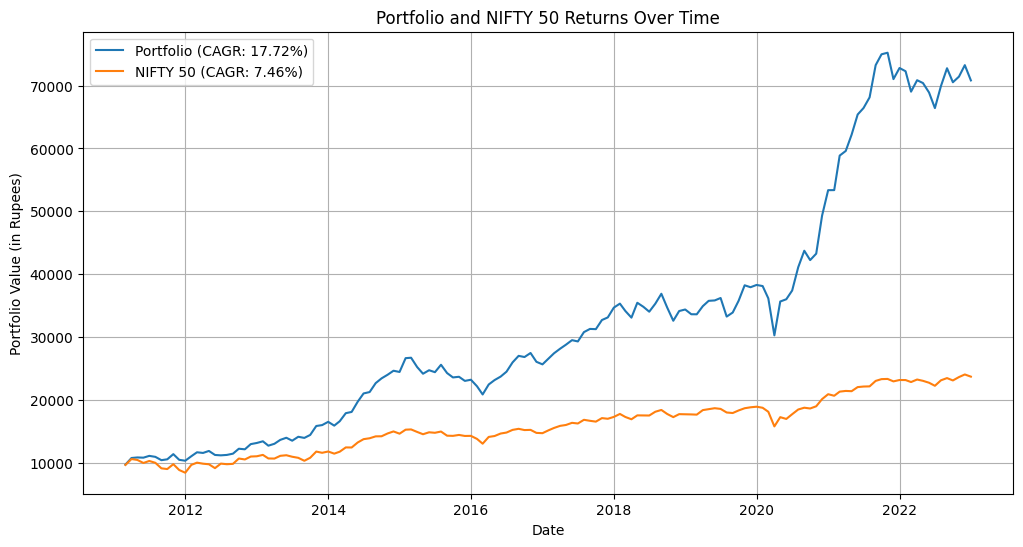

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime
# import gradio as gr

# Initialization
start_date = '2010-01-01'
end_date = '2024-01-01'
investment_amount = 10000

# Main Execution
db_path = 'nifty50_stock_data.db'
nifty_50_symbols = pd.read_csv("https://huggingface.co/spaces/pvanand/portfolio/raw/main/nifty50-stock-tickers.csv").Symbol.to_list()



class Stock:
    def __init__(self, symbol, db_path, start_date, end_date):
        self.symbol = symbol
        self.db_path = db_path
        self.start_date = start_date
        self.end_date = end_date
        self.prices = self._download_prices()

    def _download_prices(self):
        conn = sqlite3.connect(self.db_path)
        query = f"SELECT Date, Close FROM `{self.symbol}` WHERE Date BETWEEN '{self.start_date}' AND '{self.end_date}'"
        prices = pd.read_sql_query(query, conn, parse_dates=['Date'])
        prices.set_index('Date', inplace=True)
        return prices

    def CurPrice(self, curDate):
        return self.prices.loc[curDate, 'Close'] if curDate in self.prices.index else None

    def NDayRet(self, N, curDate):
        if curDate not in self.prices.index:
            return None
        start_date = self.prices.index[self.prices.index.get_loc(curDate) - N]
        start_price = self.prices.loc[start_date, 'Close']
        end_price = self.prices.loc[curDate, 'Close']
        return (end_price - start_price) / start_price

    def DailyRet(self, curDate):
        if curDate not in self.prices.index:
            return None
        previous_date = self.prices.index[self.prices.index.get_loc(curDate) - 1]
        previous_price = self.prices.loc[previous_date, 'Close']
        current_price = self.prices.loc[curDate, 'Close']
        return (current_price - previous_price) / previous_price

    def Last30daysPrice(self, curDate):
        end_loc = self.prices.index.get_loc(curDate) + 1
        start_loc = max(0, end_loc - 30)
        return self.prices.iloc[start_loc:end_loc]['Close'].values

# Function to calculate monthly and daily percentage change
def calculate_percentage_changes(stocks):
    monthly_pct_change = pd.DataFrame()
    for symbol, stock_obj in stocks.items():
        monthly_pct_change[symbol] = stock_obj.prices['Close'].resample('M').last().pct_change()
    monthly_pct_change.fillna(0, inplace=True)
    return monthly_pct_change

# Function to update stock investments
def update_stock_investments(monthly_pct_change, month_index, stock_investments):
    month = monthly_pct_change.index[month_index]
    month_performance = monthly_pct_change.loc[month]
    positive_stocks = [stock for stock, pct_change in month_performance.items() if pct_change > 0]
    portfolio_value = sum(stock_investments.iloc[month_index - 1][symbol] * (1 + monthly_pct_change.at[month, symbol])
                          for symbol in nifty_50_symbols if pd.notna(monthly_pct_change.at[month, symbol]))

    if positive_stocks:
        investment_per_positive_stock = portfolio_value / len(positive_stocks)
        stock_investments.loc[month] = {stock: investment_per_positive_stock if stock in positive_stocks else 0 for stock in nifty_50_symbols}
    else:
        stock_investments.loc[month] = 0

    return portfolio_value


def calculate_portfolio(start_date, end_date, investment_amount):

  # Initialize stock dataframes and stocks object
  stocks = {symbol: Stock(symbol, db_path, start_date, end_date) for symbol in nifty_50_symbols}
  monthly_pct_change = calculate_percentage_changes(stocks)
  stock_investments = pd.DataFrame(index=monthly_pct_change.index, columns=nifty_50_symbols)
  portfolio_returns = pd.DataFrame(index=monthly_pct_change.index, columns=["portfolio_returns"])

  # Initialize stock investments
  num_stocks = len(nifty_50_symbols)
  investment_per_stock = investment_amount / num_stocks
  stock_investments.iloc[0] = investment_per_stock

  # Calculate portfolio returns
  for month_index in range(1, len(monthly_pct_change.index)):
      portfolio_value = update_stock_investments(monthly_pct_change, month_index, stock_investments)
      portfolio_returns.at[monthly_pct_change.index[month_index], 'portfolio_returns'] = portfolio_value

  # Create Stock object and Calculate monthly returns for NIFTY50
  nifty_50_stock = Stock('NIFTY50', db_path, start_date, end_date)
  nifty_50_monthly_return = nifty_50_stock.prices['Close'].resample('M').last().pct_change()
  nifty_50_portfolio_change = nifty_50_monthly_return*(investment_amount)
  nifty_50_portfolio_value =nifty_50_portfolio_change.cumsum()+investment_amount

  return portfolio_returns, nifty_50_portfolio_value, stock_investments

def calculate_cagr(final_value, initial_value, start_date, end_date):
    num_years = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365.25
    return (final_value / initial_value) ** (1 / num_years) - 1

def plot_chart(start_date, end_date, investment_amount):
    # Assuming calculate_portfolio is a function that returns the portfolio returns
    # and nifty_50_portfolio_value over time as Pandas Series
    portfolio_returns, nifty_50_portfolio_value, stock_investments = calculate_portfolio(start_date, end_date, investment_amount)

    # Calculate CAGRs
    portfolio_cagr = calculate_cagr(portfolio_returns.iloc[-1], investment_amount, start_date, end_date)[0]
    nifty50_cagr = calculate_cagr(nifty_50_portfolio_value.iloc[-1], investment_amount, start_date, end_date)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_returns.index, portfolio_returns, label=f'Portfolio (CAGR: {portfolio_cagr*100:.2f}%)')
    plt.plot(nifty_50_portfolio_value.index, nifty_50_portfolio_value, label=f'NIFTY 50 (CAGR: {nifty50_cagr*100:.2f}%)')
    plt.title('Portfolio and NIFTY 50 Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (in Rupees)')
    plt.legend()
    plt.grid(True)
    plt.savefig('portfolio_chart.png')
    plt.show()

    return 'portfolio_chart.png', f"Portfolio CAGR: {portfolio_cagr*100:.2f}%, NIFTY 50 CAGR: {nifty50_cagr*100:.2f}%",stock_investments

# Replace these with your actual start date, end date, and investment amount
start_date = '2011-01-01'
end_date = '2023-01-01'
investment_amount = 10000

# Call the function with your actual parameters
_,_,stock_investments = plot_chart(start_date, end_date, investment_amount)

In [ ]:
stock_investments

ADANIENT   ADANIPORTS   APOLLOHOSP   ASIANPAINT     AXISBANK  \
Date                                                                          
2011-01-31        200.0        200.0        200.0        200.0        200.0   
2011-02-28   649.115912          0.0          0.0          0.0          0.0   
2011-03-31   234.575287          0.0   234.575287   234.575287   234.575287   
2011-04-30          0.0   418.356624   418.356624   418.356624          0.0   
2011-05-31   492.884851   492.884851   492.884851   492.884851          0.0   
...                 ...          ...          ...          ...          ...   
2022-08-31   1818.74699   1818.74699   1818.74699   1818.74699   1818.74699   
2022-09-30   5037.34386          0.0   5037.34386          0.0          0.0   
2022-10-31          0.0   1785.31807   1785.31807          0.0   1785.31807   
2022-11-30  2034.528131  2034.528131  2034.528131  2034.528131          0.0   
2022-12-31          0.0          0.0          0.0          0.0  7081.429501   

             BAJAJ-AUTO  BAJFINANCE  BAJAJFINSV         BPCL   BHARTIARTL  \
Date                                                                        
2011-01-31        200.0       200.0       200.0        200.0        200.0   
2011-02-28   649.115912  649.115912  649.115912          0.0   649.115912   
2011-03-31   234.575287  234.575287  234.575287   234.575287   234.575287   
2011-04-30   418.356624         0.0  418.356624   418.356624   418.356624   
2011-05-31          0.0         0.0         0.0   492.884851          0.0   
...                 ...         ...         ...          ...          ...   
2022-08-31   1818.74699  1818.74699  1818.74699          0.0   1818.74699   
2022-09-30          0.0  5037.34386         0.0          0.0   5037.34386   
2022-10-31   1785.31807         0.0  1785.31807          0.0   1785.31807   
2022-11-30  2034.528131         0.0         0.0  2034.528131  2034.528131   
2022-12-31          0.0         0.0         0.0          0.0          0.0   

            ...    SUNPHARMA   TATAMOTORS    TATASTEEL          TCS  \
Date        ...                                                       
2011-01-31  ...        200.0        200.0        200.0        200.0   
2011-02-28  ...          0.0          0.0          0.0          0.0   
2011-03-31  ...   234.575287   234.575287   234.575287   234.575287   
2011-04-30  ...   418.356624          0.0          0.0          0.0   
2011-05-31  ...   492.884851          0.0          0.0          0.0   
...         ...          ...          ...          ...          ...   
2022-08-31  ...          0.0   1818.74699   1818.74699          0.0   
2022-09-30  ...   5037.34386          0.0          0.0          0.0   
2022-10-31  ...   1785.31807   1785.31807   1785.31807   1785.31807   
2022-11-30  ...  2034.528131  2034.528131  2034.528131  2034.528131   
2022-12-31  ...          0.0          0.0  7081.429501          0.0   

             TATACONSUM        TECHM       TITAN   ULTRACEMCO          UPL  \
Date                                                                         
2011-01-31        200.0        200.0       200.0        200.0        200.0   
2011-02-28          0.0          0.0         0.0          0.0          0.0   
2011-03-31   234.575287   234.575287  234.575287   234.575287   234.575287   
2011-04-30   418.356624   418.356624  418.356624          0.0   418.356624   
2011-05-31          0.0          0.0  492.884851          0.0   492.884851   
...                 ...          ...         ...          ...          ...   
2022-08-31          0.0   1818.74699  1818.74699   1818.74699   1818.74699   
2022-09-30          0.0          0.0  5037.34386          0.0          0.0   
2022-10-31          0.0   1785.31807  1785.31807   1785.31807   1785.31807   
2022-11-30  2034.528131  2034.528131         0.0  2034.528131  2034.528131   
2022-12-31          0.0          0.0         0.0          0.0          0.0   

                  WIPRO  
Date                

## Average investment per month per stock

In [ ]:
stock_investments.astype(float).mean(axis=0).sort_values(ascending=False)

DIVISLAB      914.410811
DRREDDY       828.887599
BAJFINANCE    817.372777
ADANIENT      740.777482
HINDUNILVR    738.324039
APOLLOHOSP    736.856994
EICHERMOT     731.638713
TITAN         726.967922
JSWSTEEL      726.048240
INDUSINDBK    721.715099
ASIANPAINT    706.286255
INFY          699.933585
NESTLEIND     699.421875
BAJAJFINSV    697.382436
MARUTI        696.319088
SUNPHARMA     693.443899
CIPLA         692.726169
M&M           675.556899
HCLTECH       667.099927
TECHM         665.219389
BHARTIARTL    659.364579
BRITANNIA     656.002413
ICICIBANK     643.448954
KOTAKBANK     641.484878
TATASTEEL     640.689690
WIPRO         631.818793
UPL           624.707718
POWERGRID     621.557748
ONGC          619.884373
ITC           619.195766
HDFCBANK      611.551666
LT            608.194409
GRASIM        605.577431
RELIANCE      605.266195
TCS           604.632713
AXISBANK      602.445155
ULTRACEMCO    601.897253
SBIN          600.075592
HINDALCO      589.769667
BAJAJ-AUTO    588.357108


In [ ]:
def plot_chart(start_date, end_date, investment_amount):
    portfolio_returns, nifty_50_portfolio_value,_ = calculate_portfolio(start_date, end_date, investment_amount)

    # Creating the figure
    fig = go.Figure()

    # Adding Portfolio Returns trace
    fig.add_trace(go.Scatter(x=portfolio_returns.index, y=portfolio_returns['portfolio_returns'],
                    mode='lines',
                    name='Portfolio Returns'))

    # Adding Nifty 50 Portfolio Value trace
    fig.add_trace(go.Scatter(x=nifty_50_portfolio_value.index, y=nifty_50_portfolio_value.fillna(10000).values,
                    mode='lines',
                    name='Nifty 50 Portfolio Value'))

    # Updating layout
    fig.update_layout(
        title='Portfolio Returns Over Time',
        xaxis_title='Date',
        yaxis_title='Portfolio Value (in Rupees)',
        legend_title="Legend",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

    # Saving the figure
    #fig.write_image('portfolio_chart.png')

    # Show the figure
    fig.show()

    cagr = 100  # This should be calculated based on the actual data

    return 'portfolio_chart.png', f"CAGR: {cagr*100:.2f}%"
plot_chart(start_date, end_date, investment_amount)

('portfolio_chart.png', 'CAGR: 10000.00%')

# CONCLUSION:

**We have seen our portfolio outperforms NIFTY50 in terms of CAGR. But as we have selected the top stocks from 2024, this may have given us an edge over the other stocks. In the future calculations top 50 stocks should be selected from the begining of our testing period.**